<center>
    <img src="./images/mlfasp.png">
</center>

#### Prof. Dr. -Ing. Gerald Schuller <br> Jupyter Notebook: Renato Profeta

[Applied Media Systems Group](https://www.tu-ilmenau.de/en/applied-media-systems-group/) <br>
[Technische Universität Ilmenau](https://www.tu-ilmenau.de/)

In [15]:
# Settings for Google Colab
RunningInCOLAB = 'google.colab' in str(get_ipython())
if RunningInCOLAB:
    !git clone https://github.com/GuitarsAI/MLfAS.git
    !mv MLfAS/images/ ./

# Neural Network Detector for MNIST Digit Recognition

In [12]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/9jNt0C5quL4?rel=0" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In part 3 we saw how to use a classifier network for MNIST digit recognition. There usually we assume that the input is a digit, hence we can normalize the network classes outputs such that they represent a probability distribution which adds to one. But often in applications we would like to recognize patterns or objects, but don’t know if they are present in the input. For instance we could have a life digit recognizer, which takes a camera as input. In this case, sometime we place a paper, for instance a letter with a zip code, in front of a camera, and at other times not, which should not confuse the recognizer.

In such cases it makes sense to use a detector, as in part 1, for the recognition. This has the advantage that we could train the recognizer of each digit class to output a "1" (or a value close to it) when it recognizes its digit, or a "0" (or a
value close to it) when it is not recognizing its digit. If no digit is present, all detectors will output values close to 0,
which is something that the classifier cannot do.

For that we use the same neural network structure as in part 3 for the MNIST classifier, but with a different Loss function. Instead of the CrossEntropyLoss(), we take the MSELoss(). But the MSELoss expects a different target representation. 

For the CrossEntropyLoss, we need the class label (number) as the target, which means we have one integer (or float) input digit. The MSELoss expects a float number for each class, which means 10 float numbers for each input digit, where the correct class should have a "1", and all other classes should have a "0".

Since the MNSIT data set is made for classification, we need to convert its target to classes. We can do that by initializing a torch array with zeros, and then set it to "1" at the corresponding "correct" classes. This is also called a "**one-hot**" representation.

In [13]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/3W4c5IEKilc?rel=0" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [1]:
%%html
<iframe src="https://pytorch.org/docs/stable/nn.functional.html#one-hot" width="900" height="600"></iframe>

In [14]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/7wKKVnxR2Vs?rel=0" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [2]:
#from: https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/
#https://pytorch.org/docs/stable/torchvision/datasets.html#mnist
#Translated to PyTorch and modified to a simple fully connected network,
#by Gerald Schuller, October 2019

# Ported and modified to Jupyter Notebook by Renato Profeta, August 2020

import numpy
import matplotlib.pyplot as plt
import torch
import torchvision
import torch.nn.functional as F
import torch.nn as nn
import time

device='cpu'
#device='cuda'

In [3]:
# define the neural network model
class DenseNet(nn.Module):
    def __init__(self):
        super(DenseNet, self).__init__()
        self.layer1=nn.Sequential(nn.Linear(in_features=num_pixels, out_features=num_pixels))
        self.layer2=nn.Sequential(nn.Linear(in_features=num_pixels, out_features=num_classes))
      
   
    def forward(self, x):
        x = F.relu(self.layer1(x))  #First layer with activation function
        x = self.layer2(x)   #Second layer
        #x = torch.nn.Softmax(x)
        return x

In [4]:
batch_size_train = 100
batch_size_test = 10
num_classes = 10  #10 classes according to the 10 possible digits 0,...,9

train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('~/Downloads/MNISTfiles/', 
    train=True, download=True,
    transform=torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.1307,), (0.3081,))])),
    batch_size=batch_size_train, shuffle=True)
#the Normalize() arguments are mean and standard deviation.

test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('~/Downloads/MNISTfiles/', 
    train=False, download=True,
    transform=torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.1307,), (0.3081,))])),
    batch_size=batch_size_test, shuffle=True)

In the beginning it prints the one-hot vector y_train_onehot, where we can see that each row contains the values for the 10 classes, and indeed only one entry is "1", the others are "0".

In [5]:
examples = enumerate(train_loader)
# Plot ad hoc mnist instances

# load (downloaded if needed) the MNIST dataset
#(X_train, y_train), (X_test, y_test) = mnist.load_data()
#one trainig batch of 100 images:
batch_idx, (X_train, y_train) = next(examples)
print( "X_train.type()=",X_train.type(), "y_train.type()=",y_train.type())
print("batch_idx=", batch_idx, "X_train.shape=", X_train.shape, "y_train.shape=", y_train.shape, "y_train=", y_train)

#Make classes with one-hot encoding from the target classes:
#y_train_onehot=torch.zeros(batch_size_train,num_classes)
#for spl in range(batch_size_train):
    #y_train_onehot[spl, y_train[spl]]=1.0
y_train_onehot=torch.nn.functional.one_hot(y_train).type(torch.FloatTensor)
print("y_train_onehot=", y_train_onehot)

X_train.type()= torch.FloatTensor y_train.type()= torch.LongTensor
batch_idx= 0 X_train.shape= torch.Size([100, 1, 28, 28]) y_train.shape= torch.Size([100]) y_train= tensor([9, 1, 0, 1, 1, 3, 2, 2, 1, 6, 6, 0, 1, 6, 7, 7, 8, 5, 3, 2, 1, 3, 9, 2,
        8, 1, 3, 1, 8, 2, 4, 2, 1, 1, 3, 3, 6, 4, 6, 9, 8, 2, 4, 1, 9, 6, 8, 8,
        9, 7, 4, 8, 4, 3, 6, 9, 4, 8, 9, 8, 6, 8, 1, 5, 6, 9, 9, 9, 3, 6, 0, 7,
        2, 9, 6, 7, 8, 5, 0, 6, 4, 5, 6, 0, 0, 7, 9, 5, 7, 1, 0, 0, 9, 8, 6, 3,
        1, 1, 2, 4])
y_train_onehot= tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.

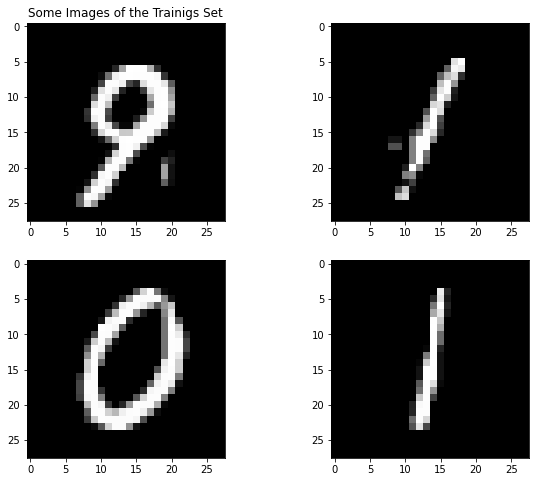

In [6]:
examples = enumerate(test_loader)
#one test batch of batch_size_test images:
batch_idx, (X_test, y_test) = next(examples)
#Make classes with one-hot encoding from the target classes:
y_test_onehot=torch.zeros(batch_size_test,num_classes)
for spl in range(batch_size_test):
    y_test_onehot[spl, y_test[spl]]=1.0

# plot 4 images as gray scale
plt.figure(figsize=(10,8))
plt.subplot(221)
plt.title("Some Images of the Trainigs Set")
plt.imshow(X_train[0,0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1,0], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2,0], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3,0], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [7]:
X_testunflat=X_test.clone() #keep original for imshow later
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[2] * X_train.shape[3]


#Flatten the images:
X_train = X_train.view(X_train.shape[0], num_pixels)
print("X_train.shape=",X_train.shape)
X_test = X_test.reshape(X_test.shape[0], num_pixels)
print("X_test.shape=",X_test.shape)

# normalize inputs from 0-255 to 0-1
#X_train = X_train / 255
#X_test = X_test / 255

# one hot encode outputs
#y_train = np_utils.to_categorical(y_train)
#y_test = np_utils.to_categorical(y_test)

X_train.shape= torch.Size([100, 784])
X_test.shape= torch.Size([10, 784])


In [8]:
# build the model
print("Generate Model:")
model = DenseNet()#.to('cpu')
    
loss_fn = nn.MSELoss()
#learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters())#, lr=learning_rate)

Generate Model:


It trains the network on the MSELoss, using just 10 iterations.

In [9]:
# Fit the model
X_train=X_train.to(device)
y_train_onehot=y_train_onehot.to(device)
starttime=time.time()
for epoch in range(10):
    Ypred=model(X_train)
    loss=loss_fn(Ypred, y_train_onehot)
    if epoch%2==0:
        print(epoch, loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
       
endtime=time.time()
print("Duration of optimization:", endtime-starttime)
#model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=200, verbose=2)

0 0.1498100459575653
2 0.09042678028345108
4 0.12411704659461975
6 0.06358765810728073
8 0.022911611944437027
Duration of optimization: 0.12865567207336426


In [10]:
# Final evaluation of the model
Ypred=model(X_test)
loss=loss_fn(Ypred, y_test_onehot)
#scores = model.forward(X_test, y_test, verbose=0)
print("Loss on the test set:", loss)

Loss on the test set: tensor(0.0603, grad_fn=<MseLossBackward>)


After that it displays a test image of a digit, prints the values of the 10 classes from the neural network. Observe those numbers. Do they show a confident detection? Then it displays the number of the class with the highest value. If this highest value is below 0.4, the it is flagged as “probably not a digit”.

Picture  0
X_testorig.shape= torch.Size([28, 28])
sample.shape= torch.Size([784])
Test Ypred= tensor([ 0.0233,  0.1547, -0.0467,  0.0799,  0.2158,  0.1013,  0.3038, -0.0160,
         0.2188,  0.2137], grad_fn=<AddBackward0>)
prediction= tensor(6)
Probably not a digit


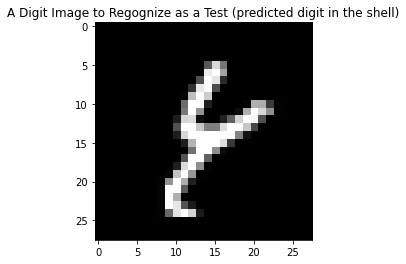

Picture  1
X_testorig.shape= torch.Size([28, 28])
sample.shape= torch.Size([784])
Test Ypred= tensor([ 0.5608, -0.1397,  0.1339,  0.1205, -0.4723,  0.2635, -0.4472,  0.1408,
         0.1972,  0.0358], grad_fn=<AddBackward0>)
prediction= tensor(0)


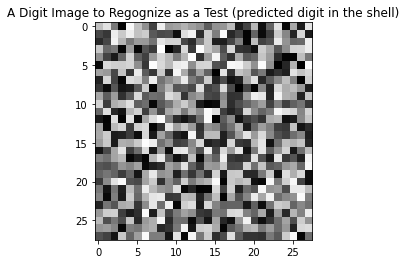

In [11]:
#"Inference", predict example digit test image:
for pic in range(2):
    print("Picture ", pic)
    if pic==0: #take image from test set:
        X_testorig=X_testunflat[1,0]
        sample=X_test[1,:]
    if pic==1: #read externa random test image, size 28x28 pixel:
        from PIL import Image
        image = Image.open('./images/randpic.jpg')
        import torchvision.transforms.functional as TF
        X_testorig = TF.to_tensor(image) 
        X_testorig = X_testorig[0,:,:]
        sample=X_testorig.view(28*28)
      
    print("X_testorig.shape=",X_testorig.shape)
    plt.imshow(X_testorig, cmap=plt.get_cmap('gray'))
    plt.title("A Digit Image to Regognize as a Test (predicted digit in the shell)")

    #sample=
    print("sample.shape=", sample.shape)
    Ypred=model(sample)
    print("Test Ypred=", Ypred)
    prediction=torch.argmax(Ypred) #use argmax as the class with the largest output
    print("prediction=", prediction)
    #Now we have the possibility to detect the case "probably not a digit" if the max output is too low,
    #since we know from the target function that perfect detection means "1.0" and 
    #perfect non-detection is "0.0",
    #by choosing some threshold:
    if Ypred[prediction] <0.4 : #not confident
        print("Probably not a digit")
    plt.show()

It takes the image of random pixels as input, clearly not showing a digit. It still shows the digit with the maximum value, but it should also show "Probably not a digit".